# Visualize new compendia

In [1]:
import os
import pandas as pd
import plotnine as pn
from sklearn.preprocessing import MinMaxScaler
import umap
import matplotlib.pyplot as plt
from core_acc_modules import paths, utils

In [2]:
# Expression data files
pao1_expression_filename = paths.PAO1_COMPENDIUM_LABEL
pa14_expression_filename = paths.PA14_COMPENDIUM_LABEL

In [3]:
pao1_expression = pd.read_csv(pao1_expression_filename, index_col=0, header=0)
pa14_expression = pd.read_csv(pa14_expression_filename, index_col=0, header=0)

## TO DO: Get core and accessory annotations
Make into a function

In [4]:
# Get mapping between PAO1 and PA14 genes using PAO1 reference
gene_annot_file = paths.GENE_PAO1_ANNOT
gene_mapping_pao1 = utils.get_pao1_pa14_gene_map(gene_annot_file, "pao1")

In [5]:
# Get mapping between PAO1 and PA14 genes using PA14 reference
gene_annot_file = paths.GENE_PA14_ANNOT
gene_mapping_pa14 = utils.get_pao1_pa14_gene_map(gene_annot_file, "pa14")

In [6]:
# Get core genes: genes that have a homolog between PAO1 and PA14
core_pao1_genes, core_pa14_genes = utils.get_core_genes(
    gene_mapping_pao1, gene_mapping_pa14, False
)
print(f"Number of PAO1 core genes: {len(core_pao1_genes)}")
print(f"Number of PA14 core genes: {len(core_pa14_genes)}")

Number of PAO1 core genes: 5366
Number of PA14 core genes: 5363


In [7]:
# Select only core genes that are included in my dataset
pao1_ref_genes = pao1_expression.columns
my_core_pao1_genes = list(set(core_pao1_genes).intersection(pao1_ref_genes))

print(f"Number of PAO1 core genes in my dataset: {len(my_core_pao1_genes)}")

Number of PAO1 core genes in my dataset: 5361


In [8]:
# Select only core genes that are included in my dataset
pa14_ref_genes = pa14_expression.columns
my_core_pa14_genes = list(set(core_pa14_genes).intersection(pa14_ref_genes))

print(f"Number of PA14 core genes in my dataset: {len(my_core_pa14_genes)}")

Number of PA14 core genes in my dataset: 5361


In [9]:
# Get PAO1-specific genes
pao1_acc = list(set(pao1_ref_genes) - set(my_core_pao1_genes))
print(f"Number of PAO1-specific genes: {len(pao1_acc)}")

Number of PAO1-specific genes: 203


In [10]:
## TO DO: Get PA14-specific genes
pa14_acc = list(set(pa14_ref_genes) - set(my_core_pa14_genes))
print(f"Number of PA14-specific genes: {len(pa14_acc)}")

Number of PA14-specific genes: 531


## Format df for plotting

In [11]:
# Create accessory df
# accessory gene ids | median accessory expression | strain label

# PAO1
pao1_acc_expression = pao1_expression[pao1_acc]
pao1_acc_expression["median acc expression"] = pao1_acc_expression.median(axis=1)

# PA14
pa14_acc_expression = pa14_expression[pa14_acc]
pa14_acc_expression["median acc expression"] = pa14_acc_expression.median(axis=1)

pao1_acc_expression.head()

/home/alexandra/anaconda3/envs/core_acc_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/home/alexandra/anaconda3/envs/core_acc_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/alexandra/anaconda3/envs/core_acc_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,PA2186,PA4555,PA0203,PA3497,PA2221,PA3066,PA1366,PA0457.1,PA0135,PA2735,...,PA1369,PA1382,PA2185,PA0207,PA2220,PA4549,PA1383,PA2771,PA2372,median acc expression
ERX1272616,9.551644,225.778452,9.313943,12.960019,13.009615,47.777189,0.0,71.204893,7.661890,0.000000,...,0.000000,0.00000,8.060711,21.572252,0.000000,5.852181,0.000000,43.853759,124.625498,9.432793
ERX1272617,8.217615,191.262900,17.802509,10.175944,10.999856,57.463851,0.0,85.228561,7.500890,0.000000,...,0.000000,0.00000,10.081026,33.767908,0.000000,5.496148,0.000000,56.378801,144.842828,10.622970
ERX1272618,62.041706,687.563548,7.725111,26.777756,43.347460,205.707054,0.0,51.568945,28.514611,0.000000,...,0.000000,0.00000,21.904490,65.598563,0.000000,19.068156,0.000000,83.953312,315.528509,18.488467
ERX1272619,68.559040,393.676703,11.038047,22.017900,53.167884,186.249203,0.0,54.901117,23.612472,0.000000,...,0.000000,0.00000,20.969271,60.691373,0.000000,18.739864,0.000000,81.482650,362.960556,16.115071
ERX1296068,85.259631,0.167152,99.355297,0.027862,0.025676,129.310645,0.0,0.281338,114.039298,0.050097,...,0.039293,0.15515,92.205412,54.612851,88.484507,0.138135,0.016056,108.260198,0.000000,34.172633


In [12]:
# Merge PAO1 and PA14 accessory dataframes
pao1_pa14_acc_expression_label = pao1_acc_expression.merge(
    pa14_acc_expression,
    left_index=True,
    right_index=True,
    suffixes=["_pao1", "_pa14"],
)

pao1_pa14_acc_expression_label.head()

,PA2186,PA4555,PA0203,PA3497,PA2221,PA3066,PA1366,PA0457.1,PA0135,PA2735,...,PA14_48230,PA14_59880,PA14_59070,PA14_22550,PA14_48460,PA14_15435,PA14_59870,PA14_54610,PA14_40340,median acc expression_pa14
ERX1272616,9.551644,225.778452,9.313943,12.960019,13.009615,47.777189,0.0,71.204893,7.661890,0.000000,...,2.452304,17.110265,15.669588,0.000000,0.000000,0.000000,9.788318,6.167769,85.014882,0.000000
ERX1272617,8.217615,191.262900,17.802509,10.175944,10.999856,57.463851,0.0,85.228561,7.500890,0.000000,...,1.955363,16.575592,18.343920,0.000000,0.000000,0.000000,7.047756,7.230886,52.990755,0.000000
ERX1272618,62.041706,687.563548,7.725111,26.777756,43.347460,205.707054,0.0,51.568945,28.514611,0.000000,...,9.599140,16.615750,15.881255,0.000000,0.000000,0.000000,18.196618,23.259838,59.137235,0.000000
ERX1272619,68.559040,393.676703,11.038047,22.017900,53.167884,186.249203,0.0,54.901117,23.612472,0.000000,...,15.672315,11.139570,14.660672,0.000000,0.000000,0.000000,13.348965,22.008689,43.302542,0.000000
ERX1296068,85.259631,0.167152,99.355297,0.027862,0.025676,129.310645,0.0,0.281338,114.039298,0.050097,...,30.180548,0.000000,0.032565,0.038683,0.064187,0.078761,0.000000,66.491576,192.075234,0.133937


/home/alexandra/anaconda3/envs/core_acc_env/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/alexandra/anaconda3/envs/core_acc_env/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_point : Removed 38 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


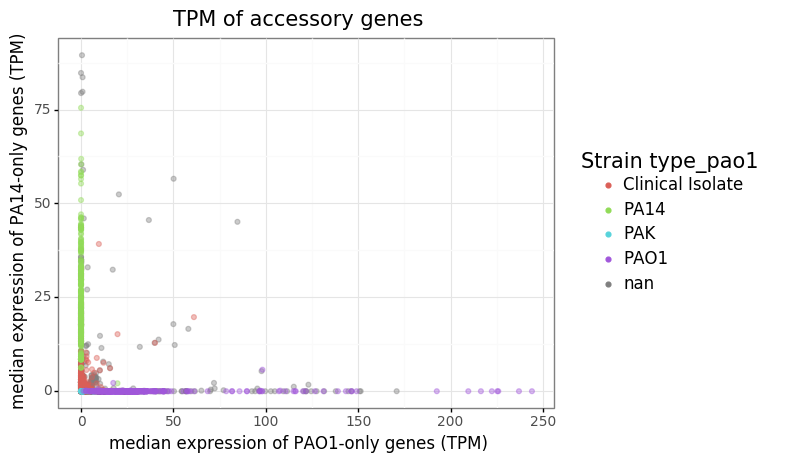

<ggplot: (8736648158069)>


In [13]:
# Plot
fig3 = pn.ggplot(
    pao1_pa14_acc_expression_label,
    pn.aes(x="median acc expression_pao1", y="median acc expression_pa14"),
)
fig3 += pn.geom_point(pn.aes(color="Strain type_pao1"), alpha=0.4)
fig3 += pn.labs(
    x="median expression of PAO1-only genes (TPM)",
    y="median expression of PA14-only genes (TPM)",
    title="TPM of accessory genes",
)
fig3 += pn.theme_bw()
fig3 += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=15),
    legend_text=pn.element_text(family="sans-serif", size=12),
    plot_title=pn.element_text(family="sans-serif", size=15),
    axis_text=pn.element_text(family="sans-serif", size=10),
    axis_title=pn.element_text(family="sans-serif", size=12),
)
fig3 += pn.guides(colour=pn.guide_legend(override_aes={"alpha": 1}))

print(fig3)

## CORE

In [14]:
# Drop label columns
pao1_expression_numeric = pao1_expression.drop(["Strain type"], axis=1)
pa14_expression_numeric = pa14_expression.drop(["Strain type"], axis=1)

In [19]:
pao1_expression_numeric.head()

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA1905,PA0195,PA4812,PA0195.1,PA0457.1,PA1552.1,PA1555.1,PA3701,PA4724.1,PA5471.1
ERX1272616,303.826480,338.798463,465.776736,397.257001,123.078091,116.111523,27.610111,92.395292,120.099900,65.326674,...,13.698890,27.208280,92.897408,33.939065,71.204893,657.254167,1486.098064,392.344294,130.879830,0.000000
ERX1272617,330.188128,396.435115,355.405558,510.353814,122.091321,97.415917,54.699405,136.762773,120.482711,69.593926,...,16.799671,38.574501,83.011113,44.890606,85.228561,756.768982,849.959061,412.307859,107.522899,0.000000
ERX1272618,135.018084,243.605396,387.460819,326.782818,62.510535,87.833830,100.756700,41.063837,25.433769,47.192284,...,19.927484,89.811363,1060.364795,90.258550,51.568945,233.096846,117.327833,155.279786,219.262436,0.000000
ERX1272619,137.159753,244.026373,439.473818,339.497122,56.730307,85.735486,101.119799,48.401275,28.088254,46.424824,...,17.654271,94.405924,999.594166,73.590495,54.901117,227.786701,129.853168,165.438964,148.654968,0.000000
ERX1296068,171.656827,117.055902,179.329385,127.622823,115.554782,220.687744,95.012675,73.627952,109.020465,95.224445,...,197.809946,282.146709,163.947262,127.030244,0.281338,426.510639,672.649975,263.379514,346.184908,10.521918


In [15]:
# 0-1 normalize per gene
scaler = MinMaxScaler()

# Fitting
normalized_pao1_expression_numeric = scaler.fit_transform(pao1_expression_numeric)
normalized_pao1_expression_numeric_df = pd.DataFrame(
    normalized_pao1_expression_numeric,
    columns=pao1_expression_numeric.columns,
    index=pao1_expression_numeric.index,
)

normalized_pa14_expression_numeric = scaler.fit_transform(pa14_expression_numeric)
normalized_pa14_expression_numeric_df = pd.DataFrame(
    normalized_pa14_expression_numeric,
    columns=pa14_expression_numeric.columns,
    index=pa14_expression_numeric.index,
)

In [17]:
# model_pao1 = pca.fit(normalized_pao1_expression_numeric_df)
model_pao1 = umap.UMAP(random_state=123).fit(normalized_pao1_expression_numeric_df)

normalized_pao1_encoded = model_pao1.transform(normalized_pao1_expression_numeric_df)

normalized_pao1_encoded_df = pd.DataFrame(
    data=normalized_pao1_encoded,
    index=normalized_pao1_expression_numeric_df.index,
    columns=["1", "2"],
)

# Add back label
normalized_pao1_encoded_df["Strain_type"] = pao1_expression["Strain type"]

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [18]:
# model_pa14 = pca.fit(normalized_pa14_expression_numeric_df)
model_pa14 = umap.UMAP(random_state=123).fit(normalized_pa14_expression_numeric_df)

normalized_pa14_encoded = model_pa14.transform(normalized_pa14_expression_numeric_df)

normalized_pa14_encoded_df = pd.DataFrame(
    data=normalized_pa14_encoded,
    index=normalized_pa14_expression_numeric_df.index,
    columns=["1", "2"],
)

# Add back label
normalized_pa14_encoded_df["Strain_type"] = pa14_expression["Strain type"]

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
# Plot PAO1
fig = pn.ggplot(normalized_pao1_encoded_df, pn.aes(x="1", y="2"))
fig += pn.geom_point(pn.aes(color="Strain_type"), alpha=0.3)
fig += pn.labs(
    x="UMAP 1", y="UMAP 2", title="Normalized RNA-seq expression using PAO1 reference"
)
fig += pn.theme_bw()
fig += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=15),
    legend_text=pn.element_text(family="sans-serif", size=12),
    plot_title=pn.element_text(family="sans-serif", size=15),
    axis_text=pn.element_text(family="sans-serif", size=12),
    axis_title=pn.element_text(family="sans-serif", size=15),
)
fig += pn.guides(colour=pn.guide_legend(override_aes={"alpha": 1}))

print(fig)

In [ ]:
# Plot PA14
fig = pn.ggplot(normalized_pa14_encoded_df, pn.aes(x="1", y="2"))
fig += pn.geom_point(pn.aes(color="Strain_type"), alpha=0.3)
fig += pn.labs(
    x="UMAP 1", y="UMAP 2", title="Normalized RNA-seq expression using PA14 reference"
)
fig += pn.theme_bw()
fig += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=15),
    legend_text=pn.element_text(family="sans-serif", size=12),
    plot_title=pn.element_text(family="sans-serif", size=15),
    axis_text=pn.element_text(family="sans-serif", size=12),
    axis_title=pn.element_text(family="sans-serif", size=15),
)
fig += pn.guides(colour=pn.guide_legend(override_aes={"alpha": 1}))

print(fig)

In [ ]:
# Create core dataframe with columns:
# core gene ids | median core expression | strain label

# PAO1
pao1_core_expression = pao1_expression[my_core_pao1_genes]
pao1_core_expression["median core expression"] = pao1_core_expression.median(axis=1)

# PA14
pa14_core_expression = pa14_expression[my_core_pa14_genes]
pa14_core_expression["median core expression"] = pa14_core_expression.median(axis=1)

pao1_core_expression.head()

In [ ]:
# Merge PAO1 and PA14 core dataframes
pao1_pa14_core_expression_label = pao1_core_expression.merge(
    pa14_core_expression,
    left_index=True,
    right_index=True,
    suffixes=["_pao1", "_pa14"],
)

pao1_pa14_core_expression_label.head()

In [ ]:
# Plot
fig = pn.ggplot(
    pao1_pa14_core_expression_label,
    pn.aes(x="median core expression_pao1", y="median core expression_pa14"),
)
fig += pn.geom_point(pn.aes(color="Strain type"), alpha=0.2)
fig += pn.labs(
    x="median expression of core genes (TPM)",
    y="median expression of core genes (TPM)",
    title="TPM of core genes",
)
fig += pn.theme_bw()
fig += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=15),
    legend_text=pn.element_text(family="sans-serif", size=12),
    plot_title=pn.element_text(family="sans-serif", size=15),
    axis_text=pn.element_text(family="sans-serif", size=10),
    axis_title=pn.element_text(family="sans-serif", size=12),
)
fig += pn.guides(colour=pn.guide_legend(override_aes={"alpha": 1}))

print(fig)